# Bharat Intern - Machine Learning Internship

## Task_1:- Housing Price Prediction

In [247]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error, mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [248]:
df= pd.read_csv(r"C:\Users\Prem\Downloads\Housing Dataset.csv")

In [249]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [250]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


## Exploratory Data Enalysis

In [251]:
df.shape

(545, 13)

In [252]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [254]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [255]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [256]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [257]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

## Data Visualization

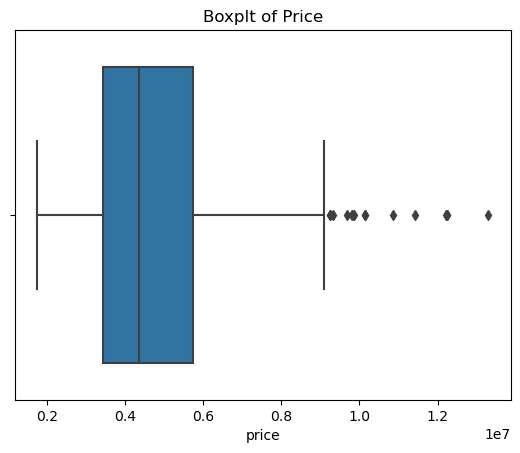

In [258]:
sns.boxplot(df.price)
plt.title('Boxplt of Price')
plt.show()

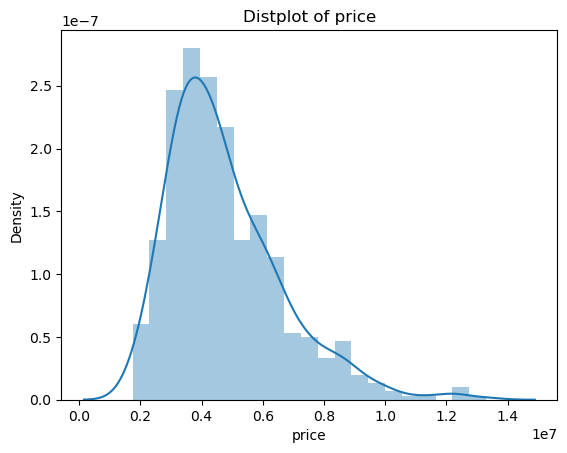

In [259]:
sns.distplot(df.price)
plt.title('Distplot of price')
plt.show()

In [260]:
num_cols=df.select_dtypes('int').columns

In [261]:
num_cols

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

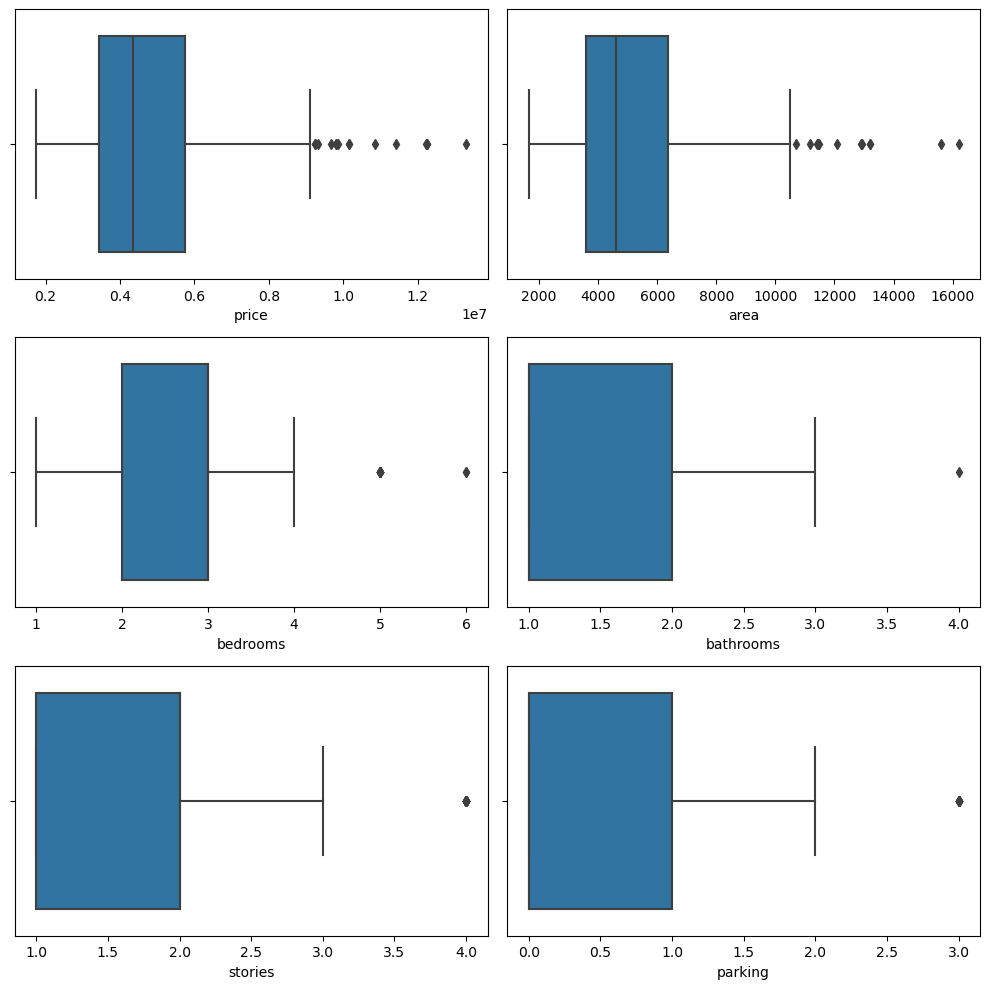

In [262]:
t=1
plt.figure(figsize=(10,10))
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(df[i])
    t+=1
plt.tight_layout()
plt.show()

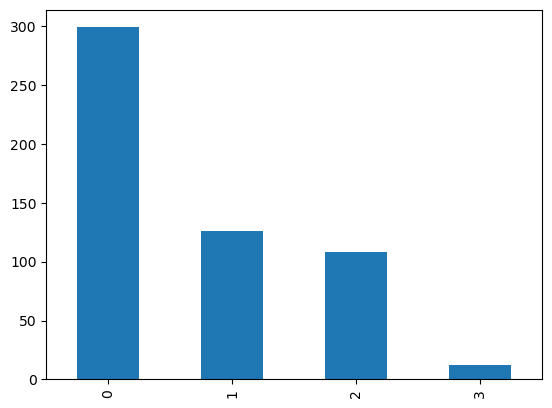

In [263]:
df.parking.value_counts().plot(kind='bar')
plt.show()

In [264]:
cat_cols= df.select_dtypes(include='object')

In [265]:
cat_cols.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

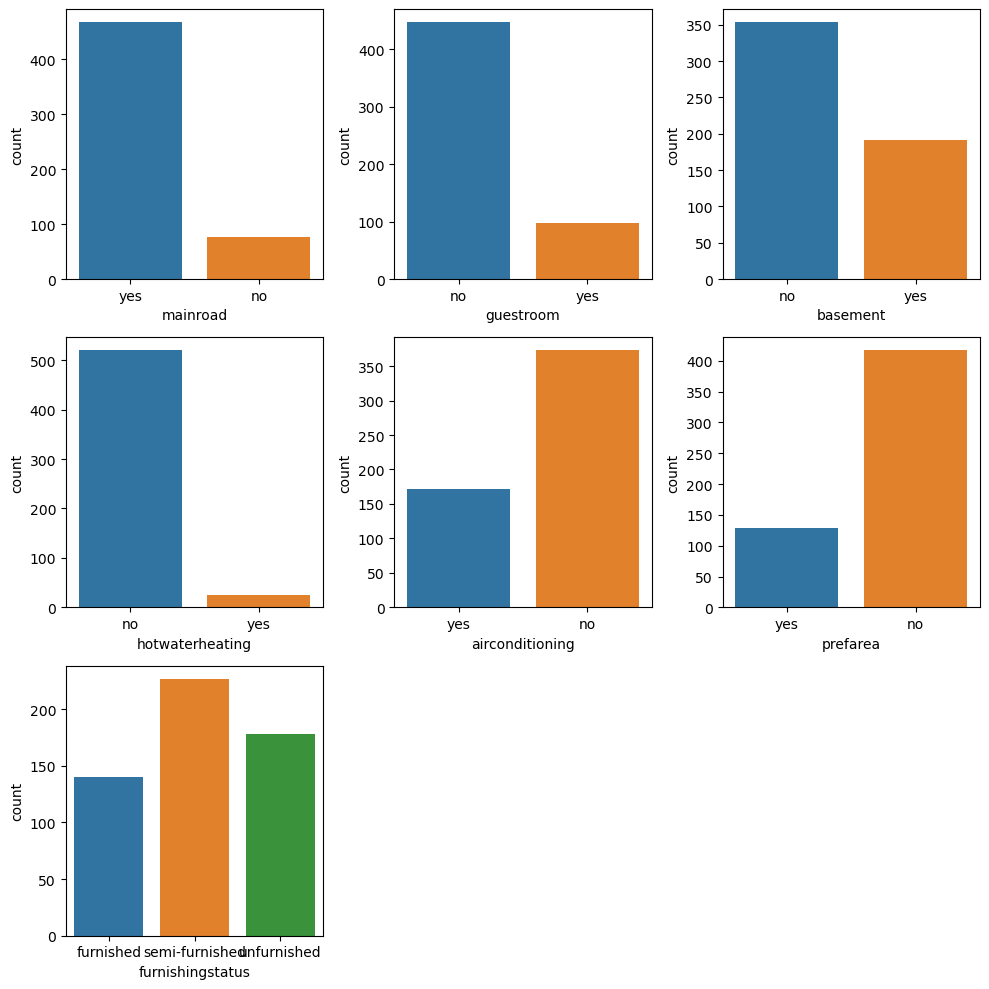

In [266]:
t=1
plt.figure(figsize=(10,10))
for i in cat_cols:
    plt.subplot(3,3,t)
    sns.countplot(df[i])
    t+=1
plt.tight_layout()
plt.show()

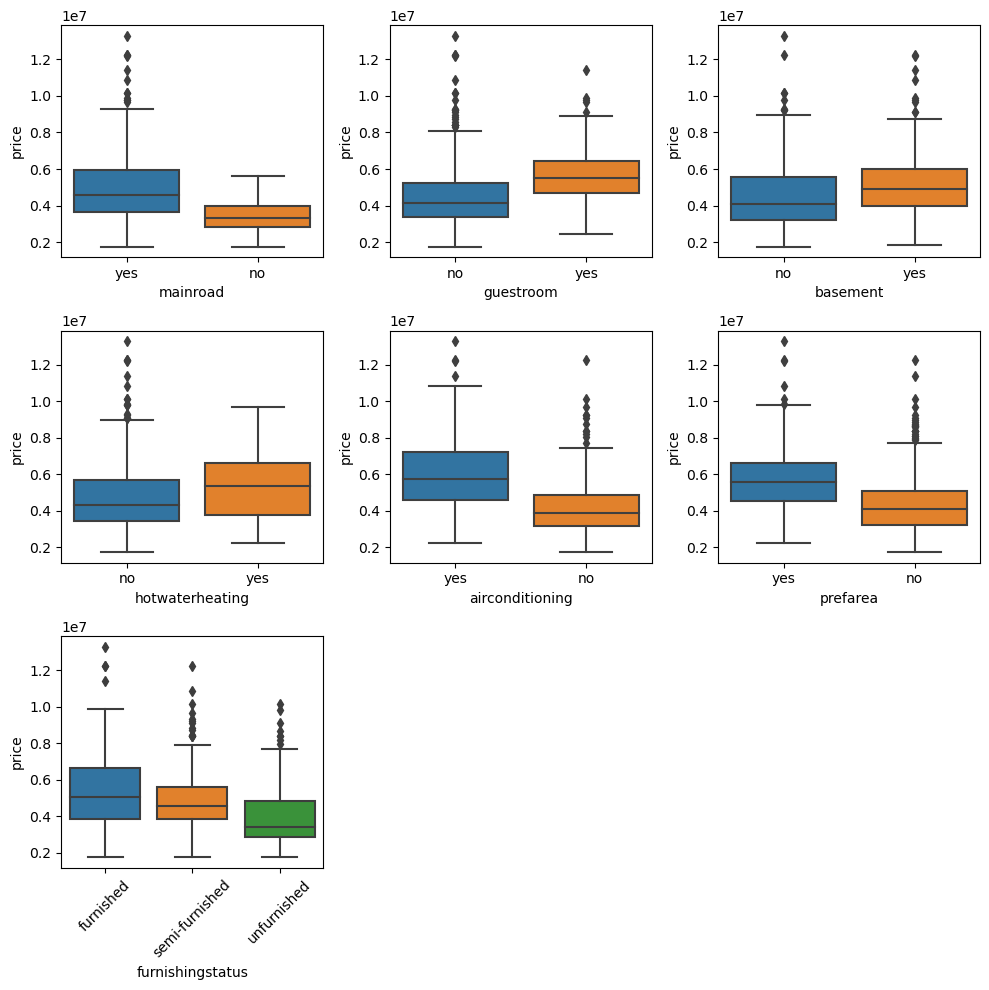

In [267]:
t=1
plt.figure(figsize=(10,10))
for i in cat_cols:
    plt.subplot(3,3,t)
    sns.boxplot(df[i], df['price'])
    t+=1
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

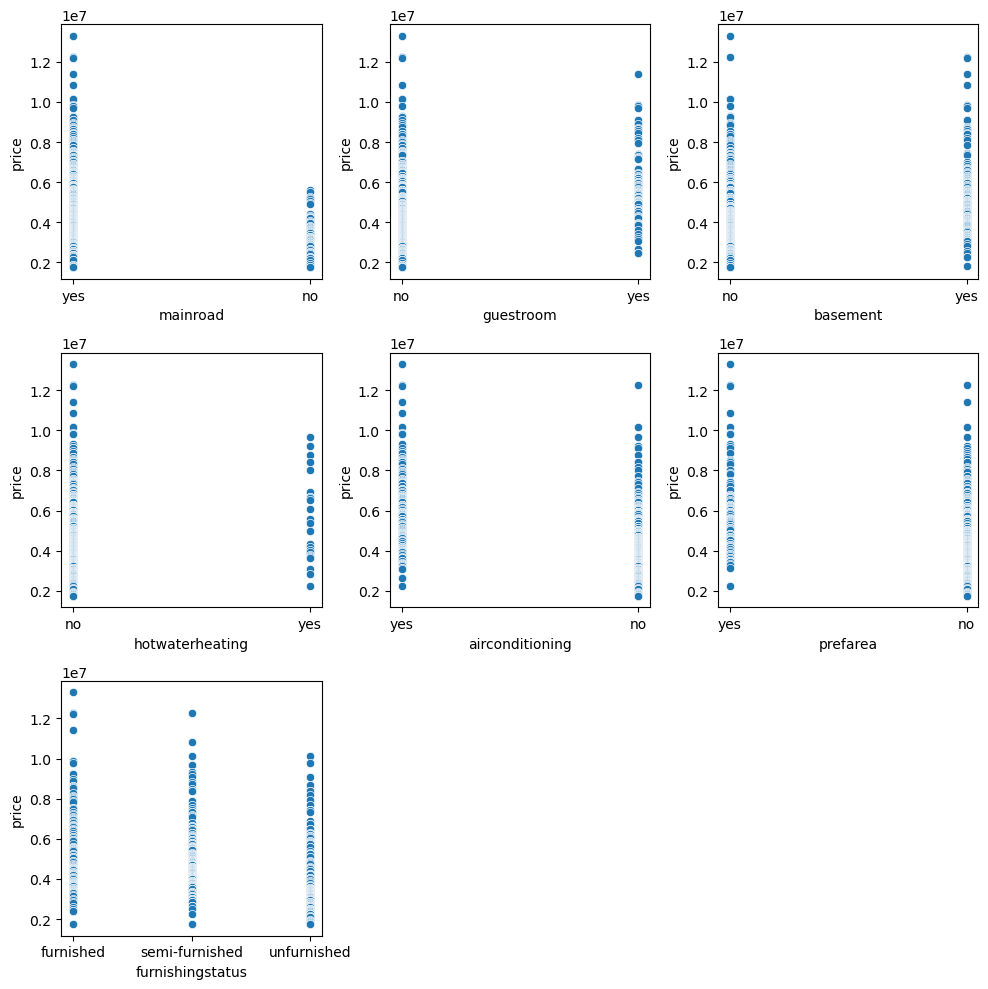

In [268]:
t=1
plt.figure(figsize=(10,10))
for i in cat_cols:
    plt.subplot(3,3,t)
    sns.scatterplot(df[i],df['price'])
    t+=1
plt.tight_layout()

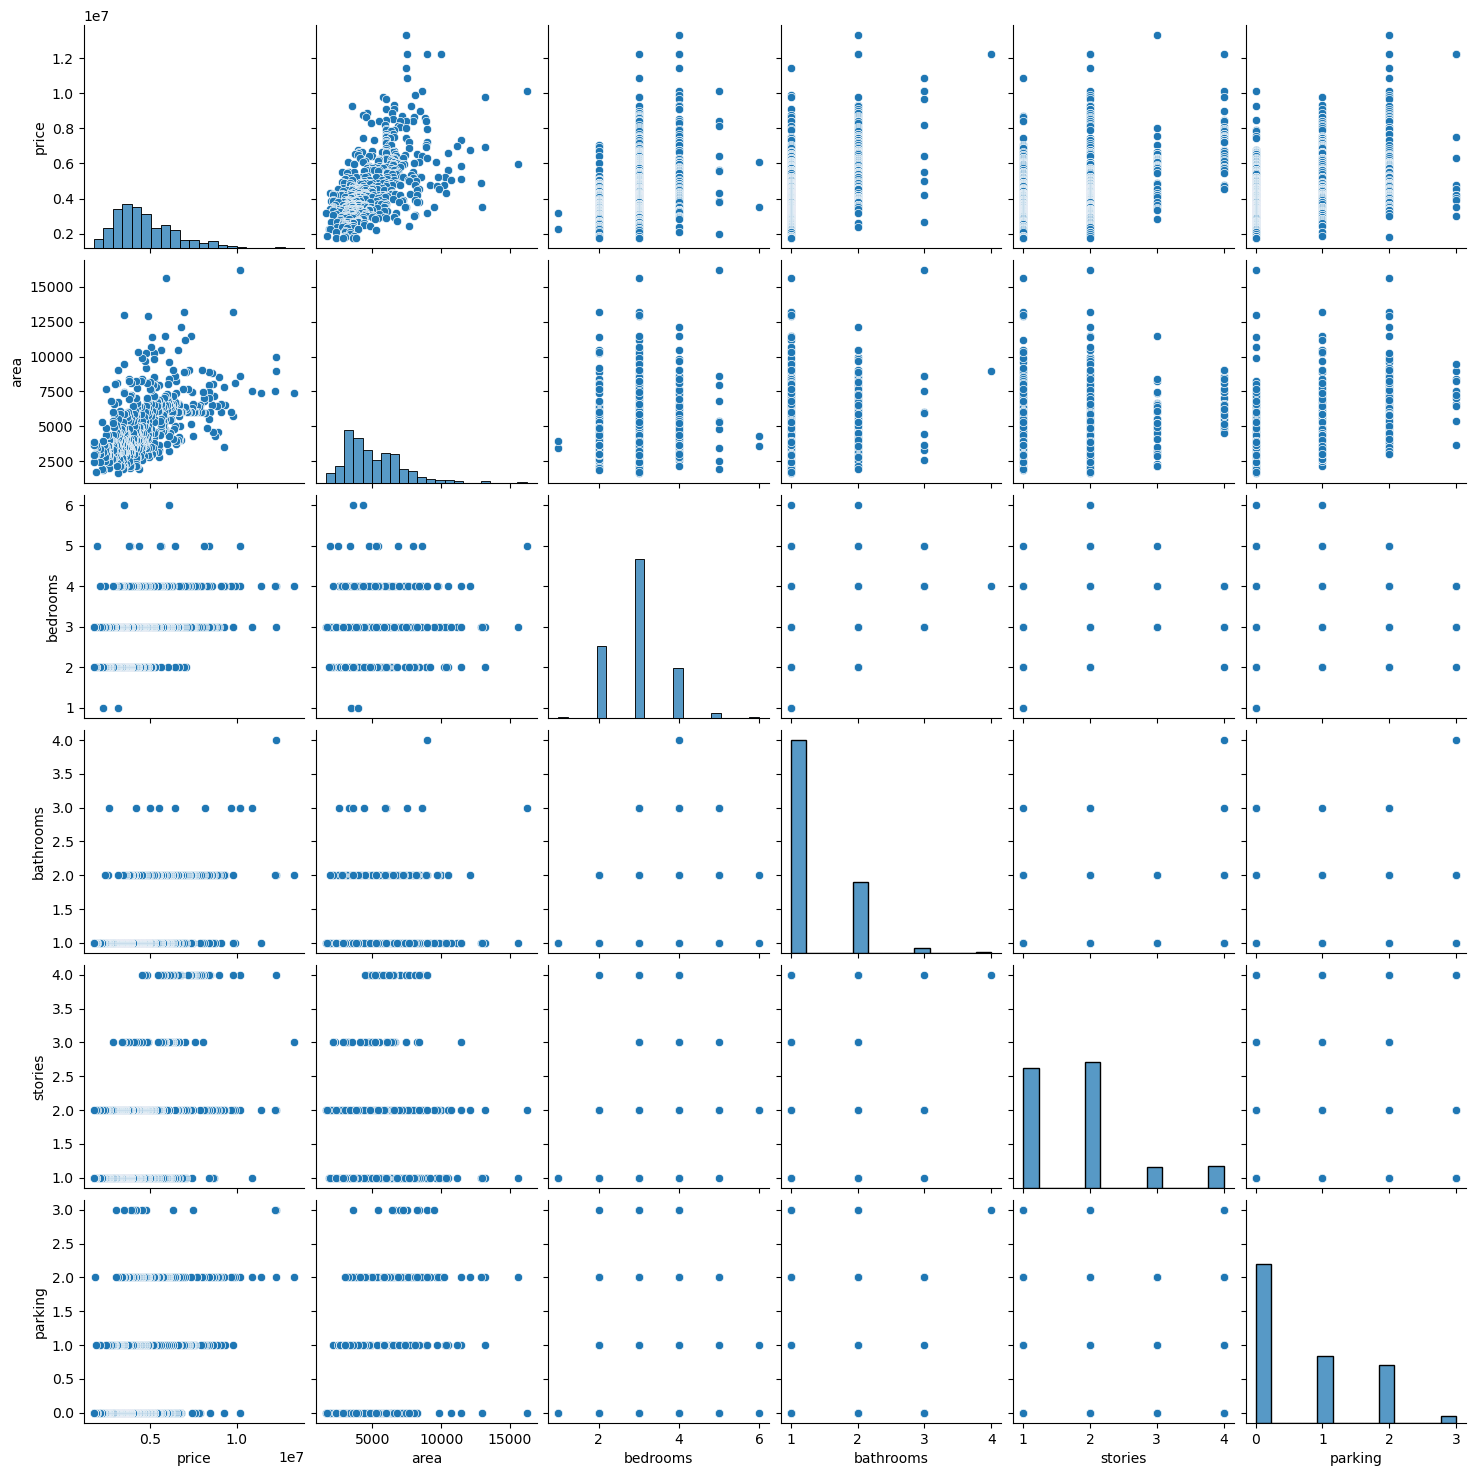

In [269]:
sns.pairplot(df)

In [270]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<AxesSubplot:>

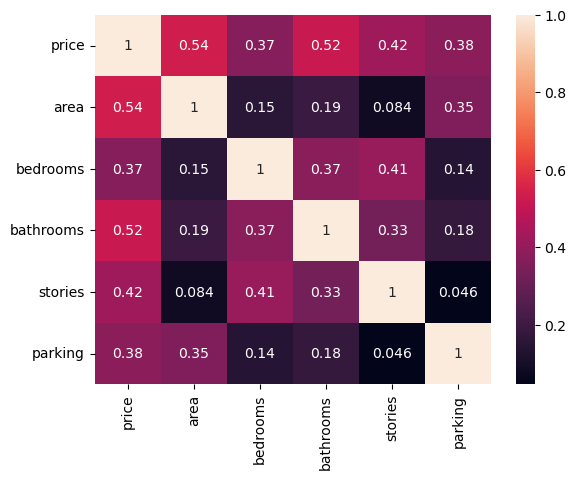

In [271]:
sns.heatmap(df.corr(),annot=True)

## Dummy Variables

In [272]:
cat_cols.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [273]:
df_dum=pd.get_dummies(df[['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus']], drop_first=True)

In [274]:
df_dum.head()

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1,0,0,0,1,1,0,0
1,1,0,0,0,1,0,0,0
2,1,0,1,0,0,1,1,0
3,1,0,1,0,1,1,0,0
4,1,1,1,0,1,0,0,0


In [275]:
df= pd.concat([df, df_dum], axis=1)

In [276]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,prefarea,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,...,yes,furnished,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,...,no,furnished,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,...,yes,semi-furnished,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,...,yes,furnished,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,...,no,furnished,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,...,no,unfurnished,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,no,no,no,no,no,...,no,semi-furnished,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,yes,no,no,no,no,...,no,unfurnished,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,no,no,no,no,no,...,no,furnished,0,0,0,0,0,0,0,0


In [277]:
df.drop(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'], axis=1, inplace=True)

In [278]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [279]:
x= df.drop(['price'],axis=1)
y= df['price']

In [280]:
x.head(3)

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1,0


In [281]:
y.head(4)

0    13300000
1    12250000
2    12250000
3    12215000
Name: price, dtype: int64

## Model Building and Model evolution

In [282]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42)

In [283]:
x_train.shape, x_test.shape

((436, 13), (109, 13))

In [284]:
y_train.shape, y_test.shape

((436,), (109,))

## Regression

In [285]:
lr= LinearRegression()

In [286]:
lr.fit(x_train, y_train)

LinearRegression()

In [287]:
lr_pred= lr.predict(x_test)

In [288]:
r2_score(y_test, lr_pred)

0.6529242642153184

In [289]:
mean_squared_error(y_test, lr_pred)

1754318687330.6643

In [290]:
np.sqrt(mean_squared_error(y_test,lr_pred))

1324506.9600914388

In [291]:
lr.coef_

array([ 2.35968805e+02,  7.67787016e+04,  1.09444479e+06,  4.07476595e+05,
        2.24841913e+05,  3.67919948e+05,  2.31610037e+05,  3.90251176e+05,
        6.84649885e+05,  7.91426736e+05,  6.29890565e+05, -1.26881818e+05,
       -4.13645062e+05])

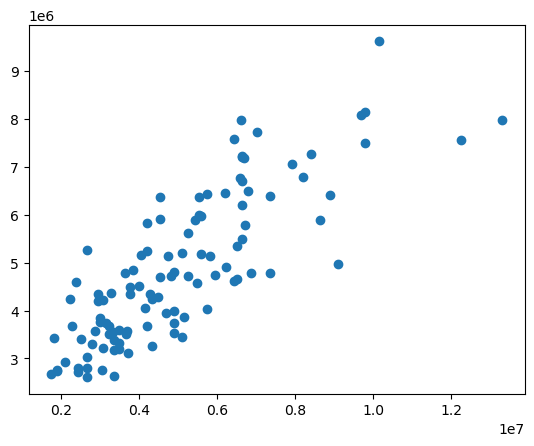

In [292]:
plt.scatter(y_test, lr_pred)

## Random Forest regressor

In [293]:
rf= RandomForestRegressor()

In [294]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [295]:
rf_pred = rf.predict(x_test)

In [296]:
r2_score(y_test, rf_pred)

0.6166539325262739

In [297]:
mean_squared_error(y_test, rf_pred)

1937649626711.707

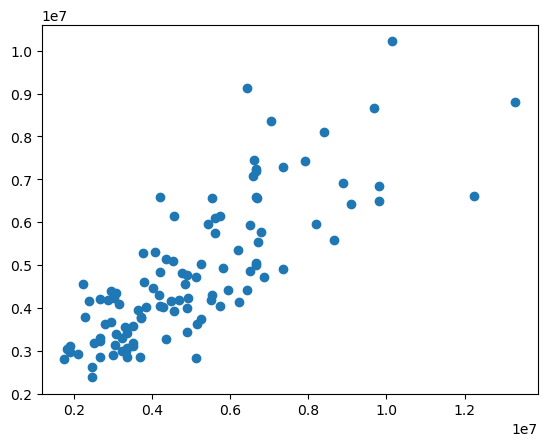

In [298]:
plt.scatter(y_test, rf_pred)